-------------
### ライブラリのインポート

In [17]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# タイピングのサポート
from typing import Optional

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

from matplotlib.ticker import FuncFormatter

plt.style.use("ggplot")

--------------
### 辞書作成

実験設定

In [18]:
TARGET = "BCR"

if TARGET == "GMV":
    X_LIM_VAR = 3e5
    X_TICKS = [2e3, 2e4, 2e5]
if TARGET == "BCR":
    X_LIM_VAR = 3e-3
    X_TICKS = [2e-3, 2e-4, 2e-5]
if TARGET == "PM":
    X_LIM_VAR = 50
if TARGET == "syn":
    X_LIM_VAR = 0.3

random_color = "#a9a9a9"
kmeans_p_color = "#f0b87a"
kmeans_o_color = "#c04e33"
once_p_color = "#b87a76"
once_o_color = "#6b1314"

各ファイルからコピペ

In [19]:
dict_100 = {
    "SFS-Kmeans-Var（最適標本配分）": 0.0022093994576861463,
    "SFS-Kmeans-Var（比例配分）": 0.0021506082252609744,
    "Kmeans（最適標本配分）": 0.0023090286383850144,
    "Kmeans（比例配分）": 0.002258015691261193,
    "Random": 0.002519417916,
}

dict_1000 = {
    "SFS-Kmeans-Var（最適標本配分）": 0.000217609405530702,
    "SFS-Kmeans-Var（比例配分）": 0.0002188283116216663,
    "Kmeans（最適標本配分）": 0.00022626416430892942,
    "Kmeans（比例配分）": 0.00022631557576274642,
    "Random": 0.00024276052159000007,
}

dict_10000 = {
    "SFS-Kmeans-Var（最適標本配分）": 1.877328748048238e-05,
    "SFS-Kmeans-Var（比例配分）": 1.8965471164100427e-05,
    "Kmeans（最適標本配分）": 2.016501238397456e-05,
    "Kmeans（比例配分）": 2.0389799886651402e-05,
    "Random": 2.2632890459900006e-05,
}


In [20]:
def make_var_dict(dict_100, dict_1000, dict_10000) -> dict:
    var_dict = {}
    var_dict["100"] = dict_100
    var_dict["1000"] = dict_1000
    var_dict["10000"] = dict_10000

    return var_dict


In [21]:
var_dict = make_var_dict(dict_100=dict_100, dict_1000=dict_1000, dict_10000=dict_10000)

In [22]:
print(var_dict)

{'100': {'SFS-Kmeans-Var（最適標本配分）': 0.0022093994576861463, 'SFS-Kmeans-Var（比例配分）': 0.0021506082252609744, 'Kmeans（最適標本配分）': 0.0023090286383850144, 'Kmeans（比例配分）': 0.002258015691261193, 'Random': 0.002519417916}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 0.000217609405530702, 'SFS-Kmeans-Var（比例配分）': 0.0002188283116216663, 'Kmeans（最適標本配分）': 0.00022626416430892942, 'Kmeans（比例配分）': 0.00022631557576274642, 'Random': 0.00024276052159000007}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 1.877328748048238e-05, 'SFS-Kmeans-Var（比例配分）': 1.8965471164100427e-05, 'Kmeans（最適標本配分）': 2.016501238397456e-05, 'Kmeans（比例配分）': 2.0389799886651402e-05, 'Random': 2.2632890459900006e-05}}


In [24]:
def scientific_notation_formatter(value, _):
    if value == 0:
        return r"$0$"  # 0の時はそのまま表示

    exponent = np.floor(np.log10(abs(value)))  # 絶対値を取って、指数部を計算
    coefficient = value / (10**exponent)

    # 科学的記数法のフォーマット
    return r"${:.0f} \times 10^{{{}}}$".format(coefficient, int(exponent))


C:\Users\HaruMomozu\AppData\Local\Temp\ipykernel_24068\2633794994.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, X_LIM_VAR)


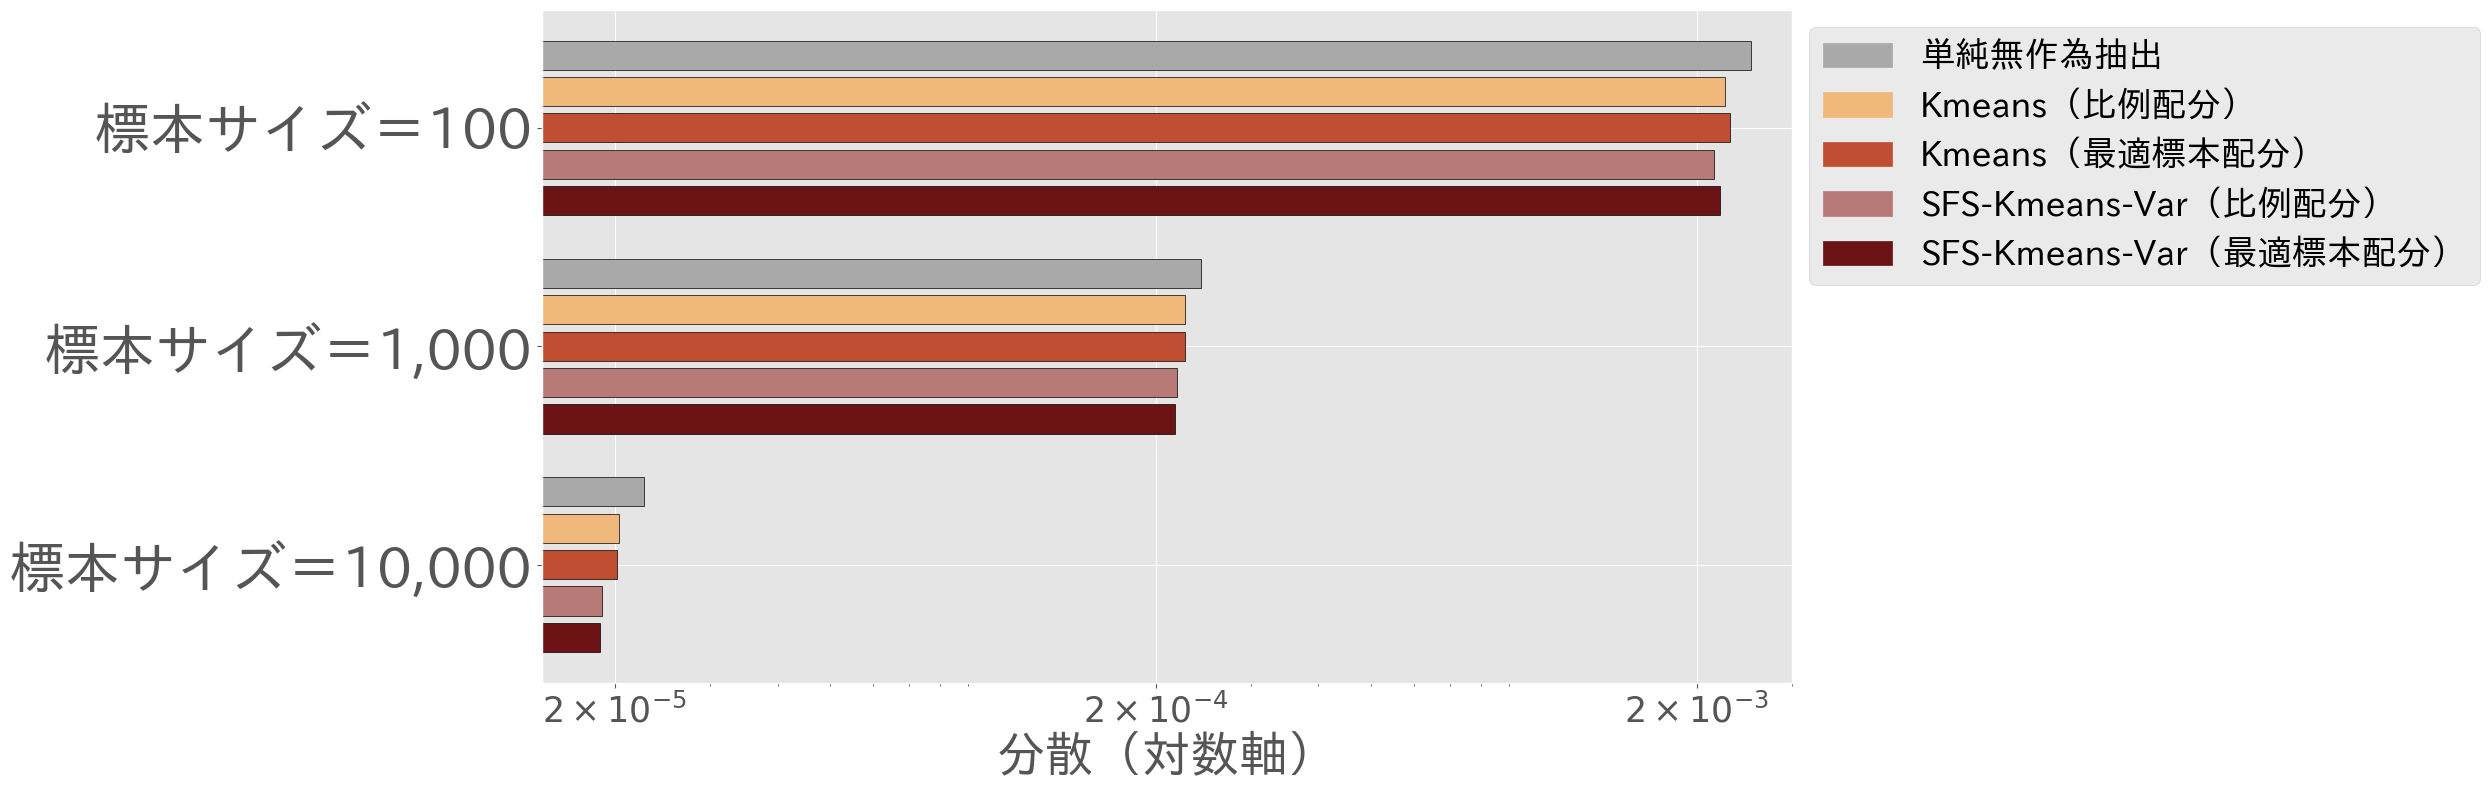

In [25]:
# グラフ用データを準備
labels = [
    "標本サイズ＝10,000",
    "標本サイズ＝1,000",
    "標本サイズ＝100",
]
values = (
    list(var_dict["10000"].values())
    + [0]
    + list(var_dict["1000"].values())
    + [0]
    + list(var_dict["100"].values())
)

# 各グループに色を割り当て、間隔には透明な色を使用
colors = (
    [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
    + ["#FFFFFF00"]
    + [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
    + ["#FFFFFF00"]
    + [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
)

# 各ラベルが3つの棒の真ん中に配置されるように位置を調整
y_positions = [2, 8, 14]

# グラフを描画
fig, ax = plt.subplots(figsize=(25, 8))
ax.barh(range(len(values)), values, color=colors, edgecolor="black")

# 凡例の追加
legend_labels = [
    "単純無作為抽出",
    "Kmeans（比例配分）",
    "Kmeans（最適標本配分）",
    "SFS-Kmeans-Var（比例配分）",
    "SFS-Kmeans-Var（最適標本配分）",
]
# 色のリスト
legend_colors = [
    random_color,
    kmeans_p_color,
    kmeans_o_color,
    once_p_color,
    once_o_color,
]
# 各ラベルに対してハンドルを作成
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=25, loc="upper left", bbox_to_anchor=(1, 1))

# y軸の目盛りとラベルを設定
ax.set_yticks(y_positions)
ax.tick_params(axis="x", labelsize=25)
ax.set_yticklabels(labels, fontsize=40)


ax.set_xlabel("分散（対数軸）", fontsize=35)
ax.set_xscale("log")
ax.set_xlim(0, X_LIM_VAR)
log_ticks = X_TICKS
formatter = FuncFormatter(scientific_notation_formatter)
ax.set_xscale("log")
ax.set_xticks(log_ticks)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


-----------
### 可視化

### 箱ひげ図